In [43]:
import json

import numpy as np
import sklearn.decomposition as skd
import sklearn.model_selection as skms
import matplotlib.pyplot as plt
import seaborn as sns

All Data: 1217
Train Data: 1167
Test Data: 50


<Axes: >

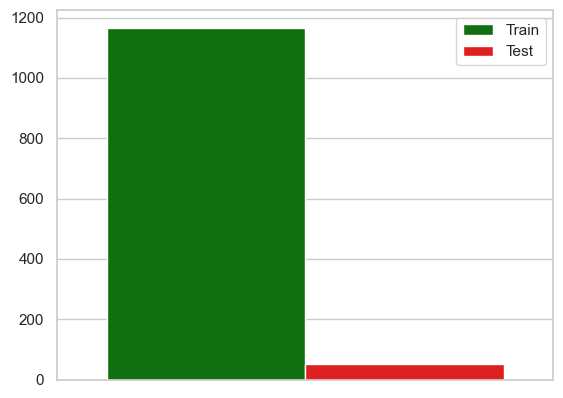

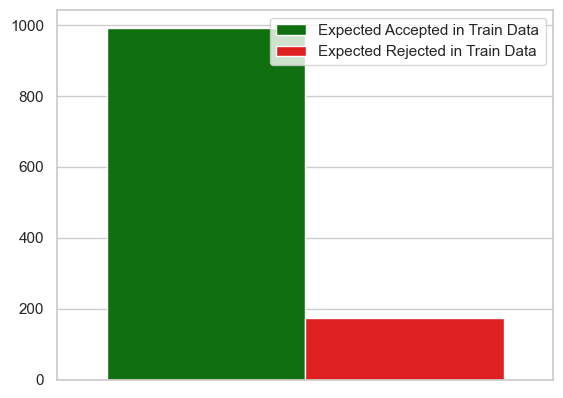

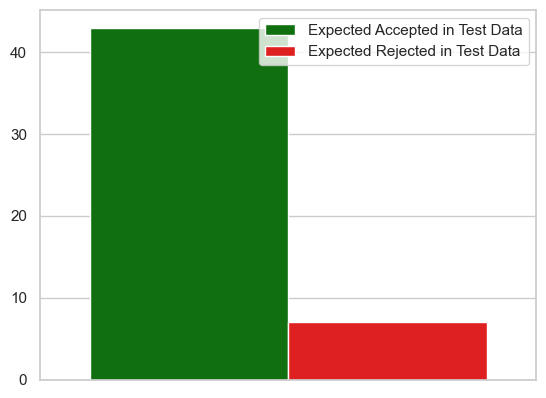

In [3]:
with open("../../data/training/train.json", "r", encoding="utf-8") as fp:
    train_reviews = json.load(fp)

with open("../../data/training/test.json", "r", encoding="utf-8") as fp:
    test_reviews = json.load(fp)


print(f"All Data: {len(train_reviews) + len(test_reviews)}")
print(f"Train Data: {len(train_reviews)}")
print(f"Test Data: {len(test_reviews)}")


sns.set_theme(style="whitegrid")

plt.figure()
sns.barplot(hue=["Train", "Test"], y=[len(train_reviews), len(test_reviews)], palette=["green", "red"])

plt.figure()
sns.barplot(hue=["Expected Accepted in Train Data", "Expected Rejected in Train Data"], y=[len([r for r in train_reviews if bool(r["conclusion"])]), len([r for r in train_reviews if not bool(r["conclusion"])])], palette=["green", "red"])

plt.figure()
sns.barplot(hue=["Expected Accepted in Test Data", "Expected Rejected in Test Data"], y=[len([r for r in test_reviews if bool(r["conclusion"])]), len([r for r in test_reviews if not bool(r["conclusion"])])], palette=["green", "red"])

In [7]:
train_data = np.array([review["rating"] for review in train_reviews])
test_data = np.array([review["rating"] for review in test_reviews])

print(f"Number of reviews in dataset: {len(train_data)}")
print(f"Number of reviews in dataset: {len(test_data)}")

print(f"Shape of train data: {train_data.shape}")
print(f"Shape of test data: {test_data.shape}")

Number of reviews in dataset: 1167
Number of reviews in dataset: 50
Shape of train data: (1167, 7)
Shape of test data: (50, 7)


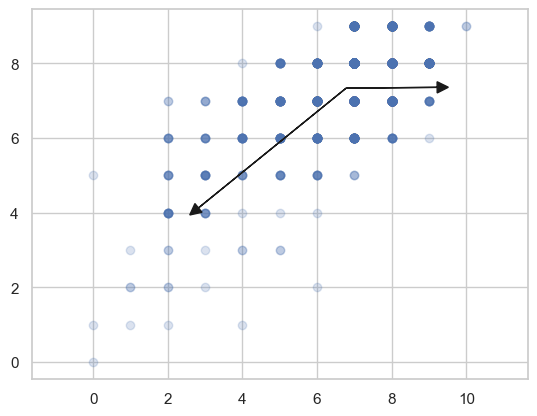

In [54]:
def permute(x: np.ndarray, y: np.ndarray):
    p = np.random.permutation(len(x))
    return x[p], y[p]

def draw_vector(v0: np.ndarray, v1: np.ndarray, ax=None):
    ax = ax or plt.gca()
    ax.arrow(v0[0], v0[1], v1[0] - v0[0], v1[1] - v0[1], head_width=0.3, head_length=0.3, fc="k", ec="k")

def draw_arrows(pca: skd.PCA, train_data: np.ndarray, permutation: list[int]):
    plt.figure()
    plt.scatter(train_data[:, permutation][:, 0], train_data[:, permutation][:, 1], alpha=0.2)
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_[permutation], (pca.mean_ + v)[permutation])
    plt.axis("equal")


pca = skd.PCA(n_components=2)
pca.fit(train_data)

draw_arrows(pca, train_data, [1, 4, 2, 0, 3, 5, 6])

Original shape: (1167, 7)
Transformed shape: (1167, 1)


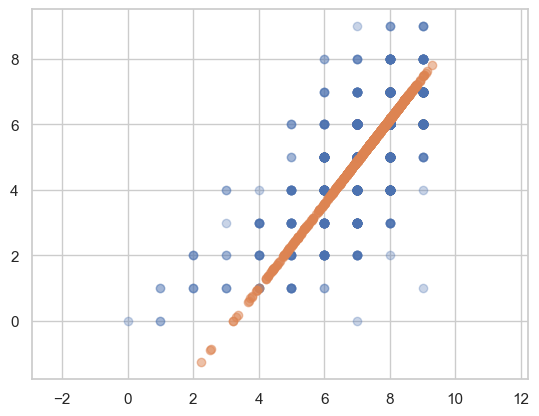

In [62]:
def draw_comparison(train_data: np.ndarray, train_data_it: np.ndarray, permutation: list[int]):
    plt.figure()
    plt.scatter(train_data[:, permutation][:, 0], train_data[:, permutation][:, 1], alpha=0.3)
    plt.scatter(train_data_it[:, permutation][:, 0], train_data_it[:, permutation][:, 1], alpha=0.5)
    plt.axis("equal")


pca = skd.PCA(n_components=1)
pca.fit(train_data)


train_data_pca = pca.transform(train_data)
train_data_it = pca.inverse_transform(train_data_pca)

print(f"Original shape: {train_data.shape}")
print(f"Transformed shape: {train_data_pca.shape}")

draw_comparison(train_data, train_data_it, [4, 3, 0, 1, 2, 5, 6])